## Jupyter declarations

In [1]:
%matplotlib inline

## Imports

In [2]:
import os
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
plt.rcParams["figure.figsize"] = (20,10)

## Get images path

In [34]:
def get_all_images(path):
    files = []
    for name in os.listdir(path):
        if os.path.isfile(os.path.join(path, name)):
            files.append(os.path.join(path,name))
    return files

## Read image

In [3]:
def read_image(filename):
    return cv2.imread(filename)

## Show image

In [4]:
def show_image(title, image, cmpa='gray'):
    plt.imshow(image, cmap=cmpa)
    plt.title(title)
    plt.show()

## Sklearn grayscale histogram

[[  1.90802256]
 [179.54362101]
 [ 49.58598726]
 [105.181165  ]
 [ 32.0620104 ]
 [240.60678168]
 [ 16.72442473]
 [ 77.06061182]
 [145.20825688]
 [206.75012775]]
[2, 180, 50, 105, 32, 241, 17, 77, 145, 207]
[(2, 67734), (180, 5263), (50, 10048), (105, 3897), (32, 1681), (241, 2180), (17, 15191), (77, 21642), (145, 2132), (207, 1957)]
[[0.00784313725490196, 0.00784313725490196, 0.00784313725490196], [0.7058823529411765, 0.7058823529411765, 0.7058823529411765], [0.19607843137254902, 0.19607843137254902, 0.19607843137254902], [0.4117647058823529, 0.4117647058823529, 0.4117647058823529], [0.12549019607843137, 0.12549019607843137, 0.12549019607843137], [0.9450980392156862, 0.9450980392156862, 0.9450980392156862], [0.06666666666666667, 0.06666666666666667, 0.06666666666666667], [0.30196078431372547, 0.30196078431372547, 0.30196078431372547], [0.5686274509803921, 0.5686274509803921, 0.5686274509803921], [0.8117647058823529, 0.8117647058823529, 0.8117647058823529]]


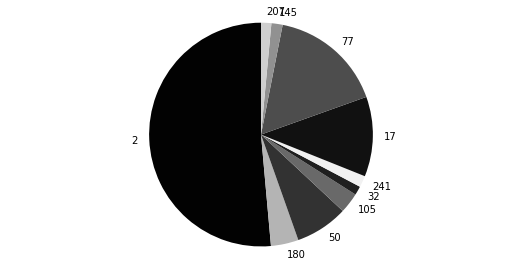

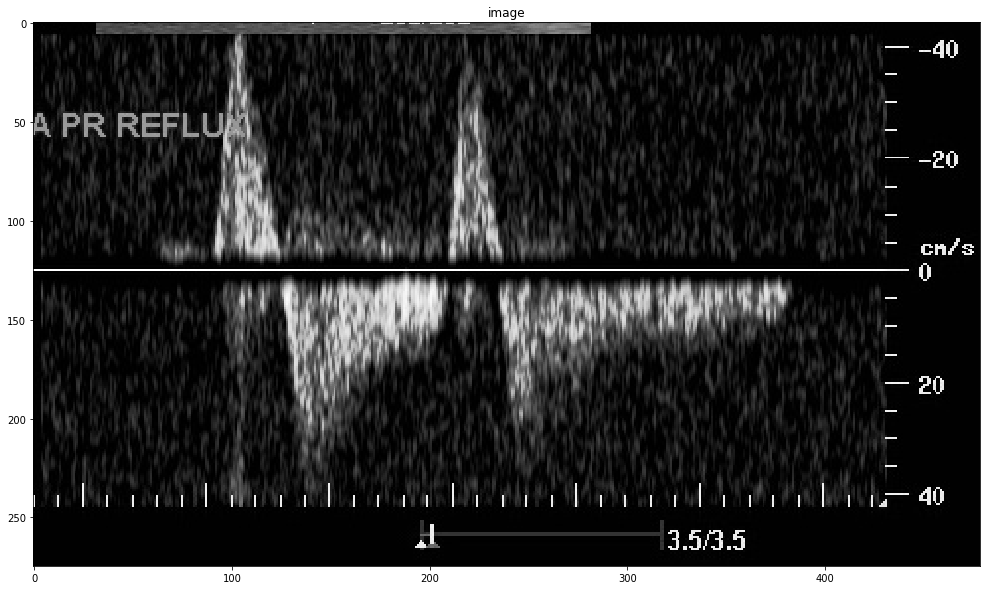

[(2, 67734),
 (180, 5263),
 (50, 10048),
 (105, 3897),
 (32, 1681),
 (241, 2180),
 (17, 15191),
 (77, 21642),
 (145, 2132),
 (207, 1957)]

In [14]:
def sklearn_grayscale_histogram(image):
    image = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_array = np.array(image)
    image_vector = image_array.reshape((-1, 1))
    model = KMeans(n_clusters=10)
    labels = model.fit_predict(image_vector)
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())
    print(model.cluster_centers_)
    colors = [int(round(color[0])) for color in model.cluster_centers_]
    print(colors)
#     ## maybe different coversion is needed because centers are float
#     colors = [[int(center[0]), int(center[1]), int(center[2])] for center in model.cluster_centers_]
    occurences = label_counts.values()
    result = list(zip(colors, list(occurences)))
    print(result)
    
    rgb_colors = [[color / 255, color / 255, color / 255] for color in colors]
    print(rgb_colors)
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=colors, colors=rgb_colors, startangle=90)
    plt.axis('equal')
    plt.show()
    show_image('image', image)
    return result
image = read_image('Photos/43.jpg')
sklearn_grayscale_histogram(image)

## Sklearn RGB histogram

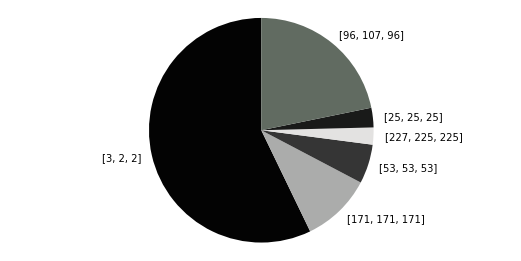

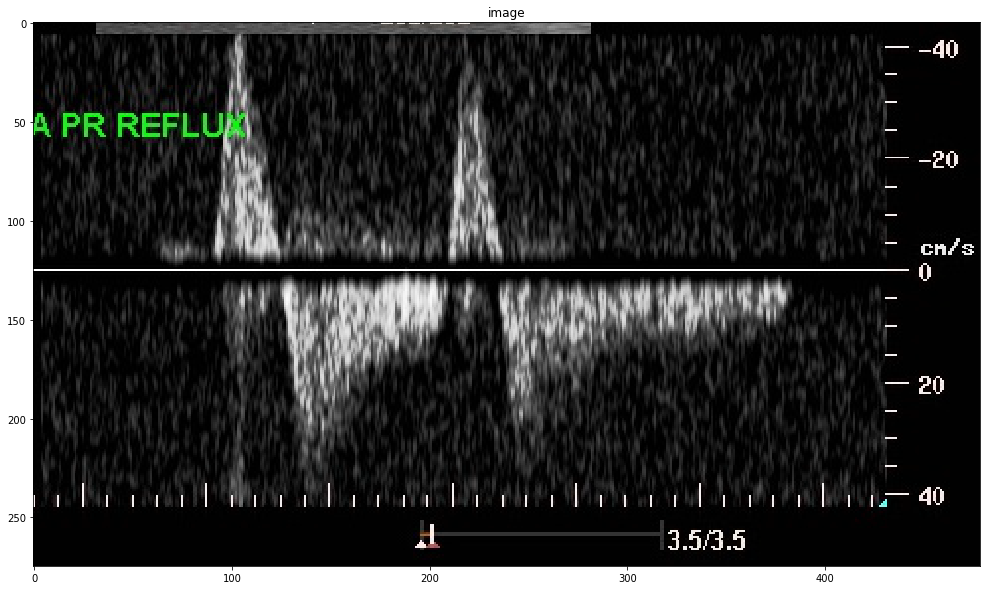

In [6]:
def sklearn_rgb_histogram(image):
    image_path = 'Photos/43.jpg'
    image = read_image(image_path)
    image_array = np.array(image)
    image_vector = image_array.reshape((image_array.shape[0] * image_array.shape[1], 3))
    model = KMeans(n_clusters=6)
    labels = model.fit_predict(image_vector)
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())
    ## maybe different coversion is needed because centers are float
    colors = [[int(center[0]), int(center[1]), int(center[2])] for center in model.cluster_centers_]
    occurences = label_counts.values()
    result = list(zip(colors, list(occurences)))
    
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=colors, colors=[color / 255 for color in model.cluster_centers_], startangle=90)
    plt.axis('equal')
    plt.show()
    show_image('image', image)
    
sklearn_rgb_histogram()
    

## Manual threshold based on selected color

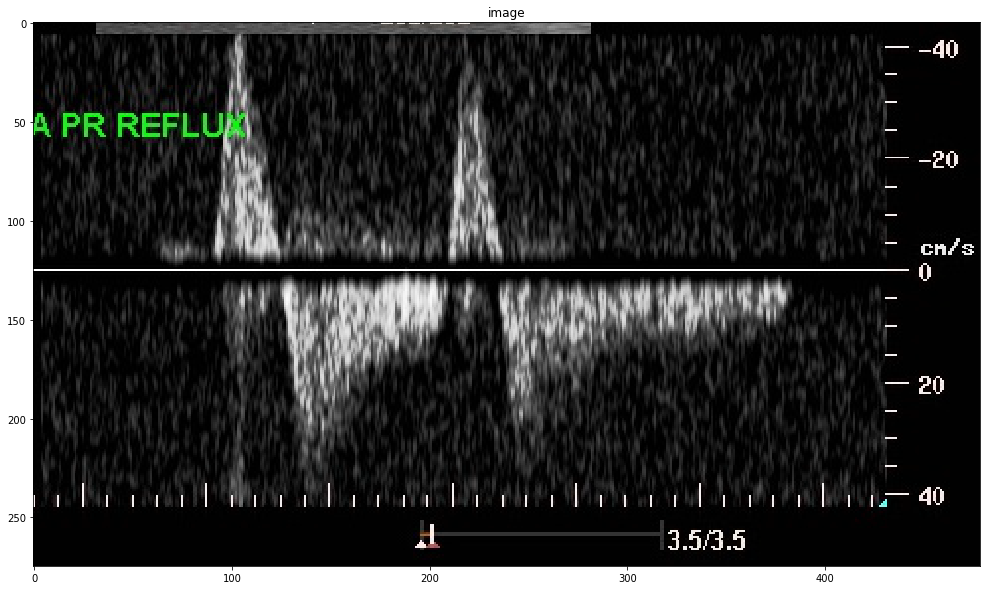

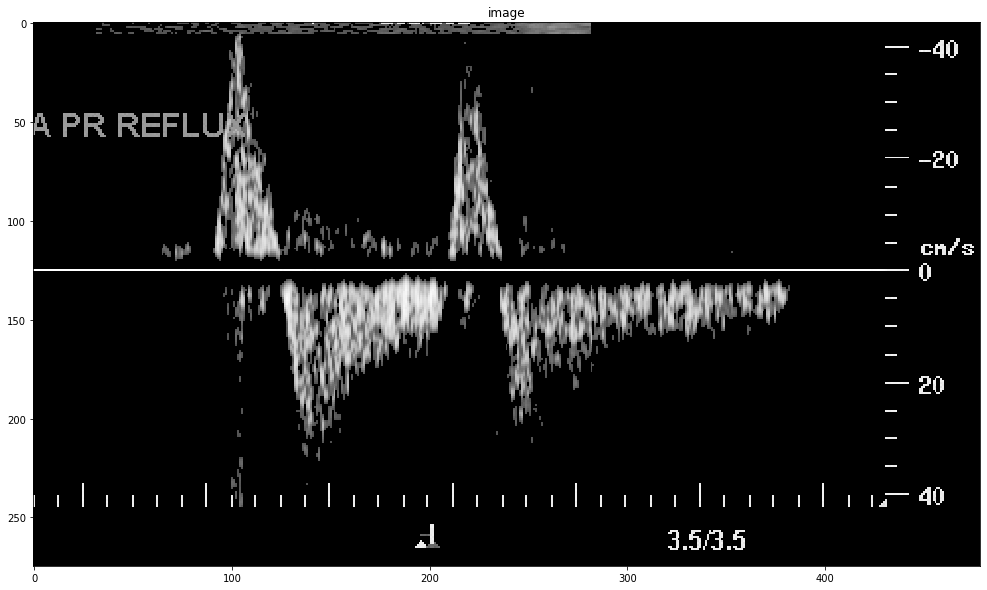

In [33]:
def manaual_threshold(image):
    image = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = image.shape
    
    for i in range(rows):
        for j in range(cols):
            pixel_value = image[i, j]
            if pixel_value <= 80:
                image[i, j] = 0
                
    show_image('image', image)
    
paths = get_all_images('Photos')
for image_path in paths:
    image = read_image(image_path)
    manaual_threshold(image)
    
show_image('image', image)
    